In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik.notebooks.phik_tutorial_spark import hists

from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv('../data/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [26]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [27]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [28]:
df.isnull().mean()*100

Survived     0.000000
Age         20.574163
Fare         0.239234
dtype: float64

In [29]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [31]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [32]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\Akshay.Mohan\AppData\Local\Temp\ipykernel_28784\2390054353.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).v

In [33]:
X_train.sample(5)

,Age,Fare,Age_imputed
205,NaN,25.7417,24.0
409,3.0,13.7750,3.0
43,30.0,13.0000,30.0
248,29.0,26.0000,29.0
98,20.0,7.8542,20.0


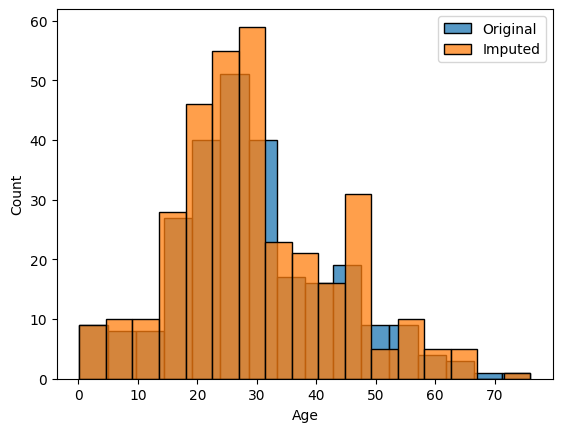

In [38]:
sns.histplot(X_train['Age'], label='Original')
sns.histplot(X_train['Age_imputed'], label='Imputed')

plt.legend()
plt.show()

In [39]:
print('original variable variance : ', X_train['Age'].var())
print('variance after random imputer : ', X_train['Age_imputed'].var())

original variable variance :  184.70402996695034
variance after random imputer :  178.523832428836


In [40]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2333.007047,216.034928,162.163001
Age,216.034928,184.704030,184.704030
Age_imputed,162.163001,184.704030,178.523832


<Axes: >

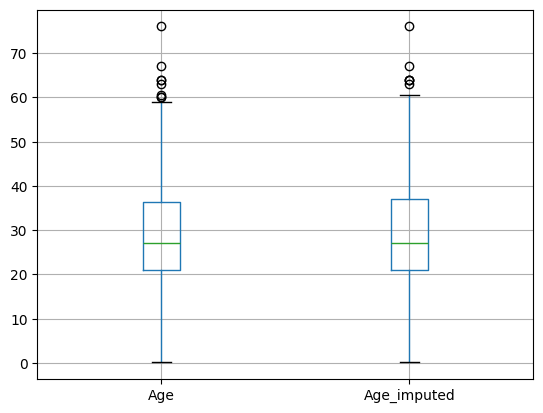

In [41]:
X_train[['Age', 'Age_imputed']].boxplot()